# UNI Machine Learning Course 
## Lab 03: Analisis exploratorio de datos (EDA) con pandas.

## "Arrests for Marijuana Possession"




### Useful resources


* Official Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)
* [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* GitHub repos: [Pandas exercises](https://github.com/guipsamora/pandas_exercises/) and ["Effective Pandas"](https://github.com/TomAugspurger/effective-pandas)
* [scipy-lectures.org](http://www.scipy-lectures.org/index.html) — tutorials on pandas, numpy, matplotlib and scikit-learn



## 1. Intro a EDA con Pandas
**[Pandas](http://pandas.pydata.org)** es una biblioteca de Python que proporciona medios extensos para el análisis de datos. Los científicos de datos a menudo trabajan con datos almacenados en formatos de tabla como `.csv`,` .tsv` o `.xlsx`. Pandas hace que sea muy conveniente cargar, procesar y analizar dichos datos tabulares mediante consultas similares a SQL. Las principales estructuras de datos en `Pandas` se implementan con las clases ** Series ** y ** DataFrame **. 

In [0]:
import numpy as np
import pandas as pd


Demostraremos los principales métodos en acción al analizar un conjunto de datos [dataset](https://vincentarelbundock.github.io/Rdatasets/datasets.html) sobre el arresto por posecion de marijuana en USA. Leamos los datos (usando `read_csv`), y echemos un vistazo a las primeras 5 líneas usando el método de la cabeza:


In [51]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Arrests.csv')
df.head()



,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,Yes,White,2002,21,Male,Yes,Yes,3
1,2,No,Black,1999,17,Male,Yes,Yes,3
2,3,Yes,White,2000,24,Male,Yes,Yes,3
3,4,No,Black,2000,46,Male,Yes,Yes,1
4,5,Yes,Black,1999,27,Female,Yes,Yes,1


<details>
<summary>Acerca de la impresión de DataFrames en cuadernos Jupyter</summary>
<p>
En los cuadernos Jupyter, los cuadros de datos de Pandas se imprimen como estas bonitas tablas que se ven arriba, mientras que `print (df.head ())` tiene un formato menos agradable.
Por defecto, Pandas muestra 20 columnas y 60 filas, por lo tanto, si su DataFrame es más grande, use la función `set_option` como se muestra en el siguiente ejemplo:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Recuerde que cada fila corresponde a un cliente, una **instancia**, y las columnas son **features** de esta instancia.


Veamos la dimensionalidad de los datos, los nombres de las características y los tipos de características.

In [52]:
print(df.shape)

(5226, 9)


Ahora intentemos imprimir nombres de columnas usando `columnas`:

In [53]:
print(df.columns)

Index(['Unnamed: 0', 'released', 'colour', 'year', 'age', 'sex', 'employed',
       'citizen', 'checks'],
      dtype='object')


Podemos usar el método `info ()` para generar información general sobre el marco de datos:

In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 9 columns):
Unnamed: 0    5226 non-null int64
released      5226 non-null object
colour        5226 non-null object
year          5226 non-null int64
age           5226 non-null int64
sex           5226 non-null object
employed      5226 non-null object
citizen       5226 non-null object
checks        5226 non-null int64
dtypes: int64(4), object(5)
memory usage: 367.5+ KB
None


`bool`, `int64`, `float64` y  `object` son los tipos de datos de nuestras características. Vemos que 0 característica es lógica (`bool`), 5 características son de tipo `object` y 4 características son numéricas. Con este mismo método, podemos ver fácilmente si hay algún valor faltante. Aquí, no hay ninguno porque cada columna contiene 5226 observaciones, el mismo número de filas que vimos antes con `shape`.

Podemos **cambiar el tipo de columna** con el método `astype`. Apliquemos este método a la función `released` para convertirlo en `int64`:


In [57]:
df['released'] = df['released'].astype('str').astype('bool')

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 9 columns):
Unnamed: 0    5226 non-null int64
released      5226 non-null bool
colour        5226 non-null object
year          5226 non-null int64
age           5226 non-null int64
sex           5226 non-null object
employed      5226 non-null object
citizen       5226 non-null object
checks        5226 non-null int64
dtypes: bool(1), int64(4), object(4)
memory usage: 331.8+ KB
None


,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,True,White,2002,21,Male,Yes,Yes,3
1,2,True,Black,1999,17,Male,Yes,Yes,3
2,3,True,White,2000,24,Male,Yes,Yes,3
3,4,True,Black,2000,46,Male,Yes,Yes,1
4,5,True,Black,1999,27,Female,Yes,Yes,1


In [58]:
#df = df.astype({"sex":'category', "age":'int', "employed" : 'bool'})
df = df.astype({"age":'int', "employed" : 'bool'})
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 9 columns):
Unnamed: 0    5226 non-null int64
released      5226 non-null bool
colour        5226 non-null object
year          5226 non-null int64
age           5226 non-null int64
sex           5226 non-null object
employed      5226 non-null bool
citizen       5226 non-null object
checks        5226 non-null int64
dtypes: bool(2), int64(4), object(3)
memory usage: 296.1+ KB
None


,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,True,White,2002,21,Male,True,Yes,3
1,2,True,Black,1999,17,Male,True,Yes,3
2,3,True,White,2000,24,Male,True,Yes,3
3,4,True,Black,2000,46,Male,True,Yes,1
4,5,True,Black,1999,27,Female,True,Yes,1


El método `describe` muestra características estadísticas básicas de cada característica numérica (tipos `int64` y  `float64`): número de valores no faltantes, media, desviación estándar, rango, mediana, 0.25 y 0.75 cuartiles.

In [59]:
df.describe()

,Unnamed: 0,year,age,checks
count,5226.000000,5226.000000,5226.000000,5226.000000
mean,2613.500000,1999.509376,23.846537,1.636433
std,1508.760584,1.390056,8.316133,1.539230
min,1.000000,1997.000000,12.000000,0.000000
25%,1307.250000,1998.000000,18.000000,0.000000
50%,2613.500000,2000.000000,21.000000,1.000000
75%,3919.750000,2001.000000,27.000000,3.000000
max,5226.000000,2002.000000,66.000000,6.000000


Para ver estadísticas sobre características no numéricas, uno tiene que indicar explícitamente los tipos de datos de interés en el parámetro `include`.

In [60]:
df.describe(include=['object', 'bool', 'category'])


,released,colour,sex,employed,citizen
count,5226,5226,5226,5226,5226
unique,1,2,2,1,2
top,True,White,Male,True,Yes
freq,5226,3938,4783,5226,4455


Para las características categóricas (tipo `objeto`) y booleano (tipo `bool`) podemos usar el método `value_counts`.  Echemos un vistazo a la distribución de `colour`:

In [61]:
df['colour'].value_counts()

White    3938
Black    1288
Name: colour, dtype: int64

De los 5226 detenidos, 3938 son *White*;  y todos tienen trabajo. Para calcular fracciones, usar `normalize = True` a la función `value_counts`.

In [62]:
df['colour'].value_counts(normalize=True)

White    0.75354
Black    0.24646
Name: colour, dtype: float64


### Sorting

Un DataFrame se puede ordenar por el valor de una de las variables (es decir, columnas). Por ejemplo, podemos clasificar por *age* (use `ascending = False` para ordenar en orden descendente):


In [63]:
df.sort_values(by='age', ascending=True).head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
5100,5101,True,White,1999,12,Male,True,Yes,0
3806,3807,True,White,1997,12,Male,True,No,5
4967,4968,True,White,1998,12,Male,True,Yes,0
189,190,True,White,2001,12,Male,True,Yes,0
2832,2833,True,White,2000,13,Male,True,Yes,0


También podemos ordenar por múltiples columnas:

In [64]:
df.sort_values(by=['age', 'year'],ascending=[True, True]).head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
3806,3807,True,White,1997,12,Male,True,No,5
4967,4968,True,White,1998,12,Male,True,Yes,0
5100,5101,True,White,1999,12,Male,True,Yes,0
189,190,True,White,2001,12,Male,True,Yes,0
1575,1576,True,Black,1997,13,Male,True,No,2



### Indexing and retrieving data

Un DataFrame se puede indexar de diferentes maneras.

Para obtener una sola columna, puede usar una construcción `DataFrame['Name']`. Usemos esto para responder solo a una pregunta sobre esa columna: 

**¿Cuál es la edad promedio de los detenidos?**



In [65]:
df['age'].mean()

23.846536548029086

**Boolean indexing** con una columna también es muy conveniente. La sintaxis es `df[P (df['Name'])]`, donde `P` es una condición lógica que se comprueba para cada elemento de la columna `Name`.  El resultado de dicha indexación es el DataFrame que consiste solo en filas que satisfacen la condición `P` en la columna `Nombre`.

Vamos a usarlo para responder la pregunta:

**¿Cuáles son los valores promedio de las características numéricas para los detenidos de raza black?**


In [66]:
df[df['colour'] == 'Black'].mean()

Unnamed: 0    2641.455745
released         1.000000
year          1999.520186
age             24.825311
employed         1.000000
checks           2.099379
dtype: float64

**¿Cuál es la edad promedio de las detenidas mujeres?**

In [67]:
df[df['sex'] == 'Female']['age'].mean()


23.532731376975168

**¿Cuántos de los detenidos hombres fueron detenidos por primera vez?**



In [68]:
df[(df['sex'] == 'Male') & (df['checks'] == 0)]['checks'].count()

1616

Los DataFrames se pueden indexar por nombre de columna (etiqueta) o por nombre de fila (índice) o por el número de serie de una fila. El método `loc` se usa para **indexar por nombre**,  mientras que `iloc()` se usa para **indexar por número**.


In [69]:
df.loc[0:10, 'sex':'checks']

,sex,employed,citizen,checks
0,Male,True,Yes,3
1,Male,True,Yes,3
2,Male,True,Yes,3
3,Male,True,Yes,1
4,Female,True,Yes,1
5,Female,True,Yes,0
6,Male,True,Yes,0
7,Female,True,Yes,1
8,Male,True,Yes,4
9,Male,True,Yes,3


In [70]:
df.iloc[0:5, 0:4]

,Unnamed: 0,released,colour,year
0,1,True,White,2002
1,2,True,Black,1999
2,3,True,White,2000
3,4,True,Black,2000
4,5,True,Black,1999


Si necesitamos la primera o la última línea del marco de datos, podemos usar la construcción `df[: 1]` o `df[-1:]`:

In [76]:
print(df[-1:])
print("                                  ")
print(df[:1])

      Unnamed: 0  released colour  year  age   sex  employed citizen  checks
5225        5226      True  White  1999   16  Male      True     Yes       3
                                  
   Unnamed: 0  released colour  year  age   sex  employed citizen  checks
0           1      True  White  2002   21  Male      True     Yes       3



### Aplicando funciones a celdas, columnas y filas

**Para aplicar funciones a cada columna, use `apply()` :**


In [77]:
df.apply(np.min) 

Unnamed: 0         1
released        True
colour         Black
year            1997
age               12
sex           Female
employed        True
citizen           No
checks             0
dtype: object

El método `apply` también se puede usar para aplicar una función a cada fila. 

Las funciones de `Lambda` son muy convenientes en tales escenarios. Por ejemplo, si necesitamos seleccionar todos los years mayores o iguales que 2002, podemos hacer:

In [78]:
df[df['year'].apply(lambda var: var >= 2002 )].head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,True,White,2002,21,Male,True,Yes,3
17,18,True,White,2002,20,Male,True,Yes,5
60,61,True,Black,2002,21,Male,True,Yes,1
106,107,True,White,2002,17,Male,True,Yes,1
154,155,True,White,2002,17,Male,True,Yes,0


El método `map` se puede usar para **reemplazar valores en una columna** al pasar un diccionario de la forma `{valor_viejo: valor_nuevo}` como argumento:

In [79]:
d = {'Male' : 'Hombre', 'Female' : 'Mujer'}
df['sex'] = df['sex'].map(d)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 9 columns):
Unnamed: 0    5226 non-null int64
released      5226 non-null bool
colour        5226 non-null object
year          5226 non-null int64
age           5226 non-null int64
sex           5226 non-null object
employed      5226 non-null bool
citizen       5226 non-null object
checks        5226 non-null int64
dtypes: bool(2), int64(4), object(3)
memory usage: 296.1+ KB


Lo mismo se puede hacer con el método `replace`:



In [0]:
#df = df.replace({'sex': d})
#df.head()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 9 columns):
Unnamed: 0    5226 non-null int64
released      5226 non-null bool
colour        5226 non-null object
year          5226 non-null int64
age           5226 non-null int64
sex           5226 non-null object
employed      5226 non-null bool
citizen       5226 non-null object
checks        5226 non-null int64
dtypes: bool(2), int64(4), object(3)
memory usage: 296.1+ KB



### Grouping

En general, agrupar datos en Pandas funciona de la siguiente manera:



```python
df.groupby (by = grouping_columns) [ columns_2_show ].function()
```

1. Primero, el método `groupby` divide los `grouping_columns` por sus valores. Se convierten en un nuevo índice en el marco de datos resultante.
2. Luego, se seleccionan las columnas de interés (`columns_2_show`). Si `columns_2_show` no está incluido, se incluirán todas las columnas que no pertenecen a groupby.
3. Finalmente, una o varias funciones se aplican a los grupos obtenidos por columnas seleccionadas.

Aquí hay un ejemplo donde agrupamos los datos según los valores de la variable `age` y mostramos estadísticas de tres columnas en cada grupo:

In [82]:
columns_2_show = ['year', 'age','checks']

df.groupby(['sex'])[columns_2_show].describe(percentiles=[])

year                                 ...    checks               
         count         mean       std     min  ...       std  min  50%  max
sex                                            ...                         
Hombre  4783.0  1999.517667  1.395177  1997.0  ...  1.540125  0.0  1.0  6.0
Mujer    443.0  1999.419865  1.331744  1997.0  ...  1.421558  0.0  0.0  5.0

[2 rows x 18 columns]

Hagamos lo mismo, pero de manera ligeramente diferente al pasar una lista de funciones a `agg ()`:

In [83]:
df.groupby(['sex'])[columns_2_show].agg([np.mean, np.std, np.min, np.max])

year                        ...    checks                    
               mean       std  amin  amax  ...      mean       std amin amax
sex                                        ...                              
Hombre  1999.517667  1.395177  1997  2002  ...  1.686807  1.540125    0    6
Mujer   1999.419865  1.331744  1997  2002  ...  1.092551  1.421558    0    5

[2 rows x 12 columns]


### Resumen de tablas

Supongamos que queremos ver cómo se distribuyen las observaciones en nuestra muestra en el contexto de dos variables: `sex` y `checks`. Para hacerlo, podemos construir una  **tabla de contingencia** utilizando el método `crosstab`:


In [84]:
pd.crosstab(df['sex'], df['checks'])

checks,0,1,2,3,4,5,6
sex,,,,,,,
Hombre,1616,783,743,904,607,121,9
Mujer,235,71,46,49,36,6,0


In [85]:
pd.crosstab(df['sex'], df['checks'], normalize=True)

checks,0,1,2,3,4,5,6
sex,,,,,,,
Hombre,0.309223,0.149828,0.142174,0.172981,0.116150,0.023153,0.001722
Mujer,0.044967,0.013586,0.008802,0.009376,0.006889,0.001148,0.000000


Esto se asemejará a las **tablas dinámicas** de Excel. Las tablas dinámicas se implementan en Pandas: el método `pivot_table` toma los siguientes parámetros:

* `valores` - una lista de variables para calcular estadísticas para,
* `index` - una lista de variables para agrupar datos por,
* `aggfunc` - qué estadísticas necesitamos calcular para los grupos, ej. Suma, media, máxima, mínima o algo más.

Veamos el número promedio de:

In [96]:
df.pivot_table(['age', 'year', 'checks'], ['sex'], aggfunc='std')

,age,checks,year
sex,,,
Hombre,8.289172,1.540125,1.395177
Mujer,8.605254,1.421558,1.331744


In [95]:
df.pivot_table(['age', 'year', 'sex'], ['checks'], aggfunc='mean')

,age,year
checks,,
0,7.562631,1.377502
1,8.100887,1.334287
2,8.595953,1.420801
3,9.248959,1.393933
4,7.815557,1.421754
5,8.359733,1.473382
6,8.062258,0.833333



### Transformaciones de DataFrame 

Como muchas otras cosas en Pandas, agregar columnas a un DataFrame se puede hacer de muchas maneras.

Por ejemplo, si queremos calcular una cantidad de acuerdo a nuestros atributos, creamos la serie `formula` y la pegamos en el DataFrame:



In [100]:
formula = df['age'] * df['checks'] + df['year'] 
df.insert(loc=2, column='formula', value=formula) 

# El parametro loc es el numero de columnas despues de las cuales se inserta el objeto Series
# Para pegarlo al final del marco de datos, lo configuramos como loc=len(df.columns)

df.head()

,Unnamed: 0,released,formula,colour,year,age,sex,employed,citizen,checks
0,1,True,2065,White,2002,21,Hombre,True,Yes,3
1,2,True,2050,Black,1999,17,Hombre,True,Yes,3
2,3,True,2072,White,2000,24,Hombre,True,Yes,3
3,4,True,2046,Black,2000,46,Hombre,True,Yes,1
4,5,True,2026,Black,1999,27,Mujer,True,Yes,1


Es posible agregar una columna sin crear una instancia Serie intermedia:

In [101]:
df['Total'] = 0.5*df['formula'] + df['age'] + df['checks'] 
df.head()

,Unnamed: 0,released,formula,colour,year,age,sex,employed,citizen,checks,Total
0,1,True,2065,White,2002,21,Hombre,True,Yes,3,1056.5
1,2,True,2050,Black,1999,17,Hombre,True,Yes,3,1045.0
2,3,True,2072,White,2000,24,Hombre,True,Yes,3,1063.0
3,4,True,2046,Black,2000,46,Hombre,True,Yes,1,1070.0
4,5,True,2026,Black,1999,27,Mujer,True,Yes,1,1041.0


Para eliminar columnas o filas, use el método `drop`, pasando los índices requeridos y el parámetro `axis` (`1` si elimina columnas, y nada o `0` si elimina filas). El argumento `inplace` indica si se debe cambiar el DataFrame original. Con `inplace=False`, el método `drop` no cambia el DataFrame existente y devuelve uno nuevo con filas o columnas eliminadas. Con `inplace=True`, altera el DataFrame.

In [104]:
# deshacerse de las columnas recien creadas
df.drop(['Total', 'formula'], axis=1, inplace=True) 
df.drop([1, 2]).head() 

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,True,White,2002,21,Hombre,True,Yes,3
3,4,True,Black,2000,46,Hombre,True,Yes,1
4,5,True,Black,1999,27,Mujer,True,Yes,1
5,6,True,Black,1998,16,Mujer,True,Yes,0
6,7,True,White,1999,40,Hombre,True,Yes,0


## 2. Tablas de contingencia y Visualizacion

Veamos cómo se relaciona el sex con la función *Checks*. 

Haremos esto utilizando una tabla de contingencia de la tabla de referencias cruzadas y también a través del análisis visual con "Seaborn"

In [105]:
pd.crosstab(df['sex'], df['checks'], margins=True)

checks,0,1,2,3,4,5,6,All
sex,,,,,,,,
Hombre,1616,783,743,904,607,121,9,4783
Mujer,235,71,46,49,36,6,0,443
All,1851,854,789,953,643,127,9,5226


In [0]:
# imports to set up plotting 
import matplotlib.pyplot as plt
# !pip install seaborn 
import seaborn as sns

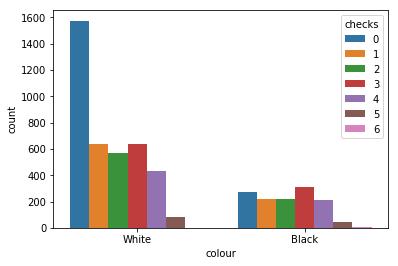

In [107]:
sns.countplot(x='colour', hue='checks', data=df);

similarmente

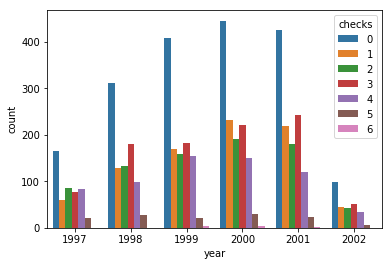

In [108]:
sns.countplot(x='year', hue='checks', data=df);

Ahora agreguemos una función binaria a nuestro Marco de datos: `More than one> 1`. Y una vez más, veamos cómo se relaciona con checks.

In [109]:
#df['More than one'] = (df['checks'] > 1).astype('int')
df['More than one'] = (df['checks'] > 1)

pd.crosstab(df['More than one'], df['checks'], margins=True)

checks,0,1,2,3,4,5,6,All
More than one,,,,,,,,
False,1851,854,0,0,0,0,0,2705
True,0,0,789,953,643,127,9,2521
All,1851,854,789,953,643,127,9,5226


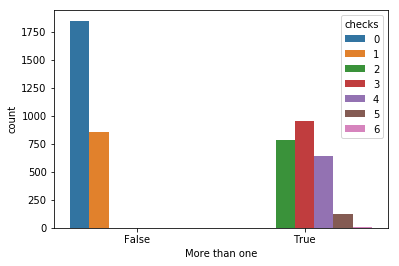

In [112]:
sns.countplot(x='More than one', hue='checks', data=df);

Construyamos otra tabla de contingencia que relacione *sex* con *More than one* y con * checks* recién creados.



In [113]:
pd.crosstab(df['More than one'] & df['sex'] , df['checks'])

checks,0,1,2,3,4,5,6
row_0,,,,,,,
False,1851,854,0,0,0,0,0
True,0,0,789,953,643,127,9


A medida que avanzamos en este curso, recuerde que, antes del advenimiento del aprendizaje automático, el proceso de análisis de datos se parecía a esto. Vamos a resumir lo que hemos cubierto:
     
- Conseguimos estas dos líneas de base sin aplicar el aprendizaje automático, y servirán como punto de partida para nuestros modelos posteriores. Si resulta que con un esfuerzo enorme, aumentamos la proporción de respuestas correctas en un 0,5% per se, entonces posiblemente estamos haciendo algo mal y basta con limitarnos a un modelo simple con dos condiciones;
- Antes de entrenar modelos complejos, se recomienda manipular un poco los datos, hacer algunos gráficos y verificar suposiciones simples. Además, en las aplicaciones empresariales de aprendizaje automático, generalmente comienzan con soluciones simples y luego experimentan con soluciones más complejas.

## 3. Tarea

En esta tarea, debe usar Pandas para responder algunas preguntas sobre el  [dataset](https://archive.ics.uci.edu/ml/datasets/Adult) que contiene datos sociodemográficos

Escriba el codigo que da la respuesta.

In [114]:
#codigo
import pandas as pd
url = 'https://raw.githubusercontent.com/PCL-AI/MT616_2019_1/master/Lab02/adult.csv'
data = pd.read_csv(url)
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**1.   ¿Cuántos hombres y mujeres están representados en este conjunto de datos?**





In [0]:
#codigo



**2.   ¿Cuál es la edad promedio de las mujeres?**








In [0]:
#codigo

**3.   ¿Cuál es el porcentaje de ciudadanos cubanos?**

In [0]:
#codigo

**4.  ¿Cuál es la media y la desviación estándar de la edad para quienes ganan más de 50 mil y quienes ganan menos de 50 mil?**

In [0]:
#codigo

**5. ¿Es cierto que las personas que ganan más de 50K tienen al menos algun grado de estudios?**

In [0]:
#codigo

**6. Mostrar estadísticas de edad para cada raza y cada sexo usando groupby() y describe().**

In [0]:
#codigo

**7. Encuentra la edad máxima de los hombres de raza Asian-Pac-Islander.**

In [0]:
#codigo

**8. ¿Quiénes son la mayor proporción que ganan mas > 50 K: hombres casados o solteros? Considerar como casados a todos que tienen un estado civil como : cónyuge civil, casado, cónyuge ausente o cónyuge casado**

In [0]:
#codigo

**9. ¿Cuál es el número máximo de horas que una persona trabaja por semana? y ¿Cuántas personas tabajan ese numero de horas? y ¿Cuál es el procentaje de aquellas personas que ganan mas > 50 K?**

In [0]:
#codigo

**10. Cuente el tiempo promedio de trabajo (horas por semana) para aquellos que ganan poco y aquellos que ganan mucho para cada país.**

In [0]:
#codigo

## 4. Intro a Regresion lineal

En esta parte usar el  [Notebook](https://github.com/PCL-AI/MT616_2019_1/blob/master/Lab03/Lab03.ipynb)  y terminar los ejercicios